## For testing GEFS import and plotting - forecast probabilistic data


In [1]:
import datetime

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

from herbie import Herbie

from src.gefsdata import GEFSData
import src.plotting as plotting 
from src.lookups import elevations
import src.utils as utils

In [2]:
init_dt = datetime.datetime(2023,12,5,18,0,0)

H = Herbie(
    "2023-12-05 18:00",
    model="gefs",
    product="atmos.5",
    # member="p01",
    # priority="google",
    # fxx=0,
    member="mean",
)
H

✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Dec-03 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


▌▌Herbie GEFS model atmos.5 product initialized 2023-Dec-03 00:00 UTC F00 ┊ source=aws

In [3]:
H.PRODUCTS


{'atmos.5': 'Half degree atmos PRIMARY fields (pgrb2ap5); ~83 most common variables.',
 'atmos.5b': 'Half degree atmos SECONDARY fields (pgrb2bp5); ~500 least common variables',
 'atmos.25': 'Quarter degree atmos PRIMARY fields (pgrb2sp25); ~35 most common variables',
 'wave': 'Global wave products.',
 'chem.5': 'Chemistry fields on 0.5 degree grid',
 'chem.25': 'Chemistry fields on 0.25 degree grid'}

In [4]:
df = H.inventory()
df

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,search_this
0,1,0,221774,0-221774,2023-12-03,2023-12-03,HGT,10 mb,anl,ENS=+1,:HGT:10 mb:anl:ENS=+1
1,2,221774,352388,221774-352388,2023-12-03,2023-12-03,TMP,10 mb,anl,ENS=+1,:TMP:10 mb:anl:ENS=+1
2,3,352388,378806,352388-378806,2023-12-03,2023-12-03,RH,10 mb,anl,ENS=+1,:RH:10 mb:anl:ENS=+1
3,4,378806,531954,378806-531954,2023-12-03,2023-12-03,UGRD,10 mb,anl,ENS=+1,:UGRD:10 mb:anl:ENS=+1
4,5,531954,674759,531954-674759,2023-12-03,2023-12-03,VGRD,10 mb,anl,ENS=+1,:VGRD:10 mb:anl:ENS=+1
...,...,...,...,...,...,...,...,...,...,...,...
66,67,13170608,13428385,13170608-13428385,2023-12-03,2023-12-03,VGRD,10 m above ground,anl,ENS=+1,:VGRD:10 m above ground:anl:ENS=+1
67,68,13428385,13587160,13428385-13587160,2023-12-03,2023-12-03,PWAT,entire atmosphere (considered as a single layer),anl,ENS=+1,:PWAT:entire atmosphere (considered as a singl...
68,69,13587160,13736479,13587160-13736479,2023-12-03,2023-12-03,CAPE,180-0 mb above ground,anl,ENS=+1,:CAPE:180-0 mb above ground:anl:ENS=+1
69,70,13736479,13894257,13736479-13894257,2023-12-03,2023-12-03,CIN,180-0 mb above ground,anl,ENS=+1,:CIN:180-0 mb above ground:anl:ENS=+1


In [5]:
df.variable.unique()


array(['HGT', 'TMP', 'RH', 'UGRD', 'VGRD', 'VVEL', 'PRES', 'TSOIL',
       'SOILW', 'WEASD', 'SNOD', 'ICETK', 'PWAT', 'CAPE', 'CIN', 'PRMSL'],
      dtype=object)

In [6]:
H.inventory("SNOD")


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,search_this
61,62,12324321,12403629,12324321-12403629,2023-12-03,2023-12-03,SNOD,surface,anl,ENS=+1,:SNOD:surface:anl:ENS=+1


In [7]:
ds = H.xarray(":SNOD:")
ds

<xarray.Dataset>
Dimensions:              (latitude: 361, longitude: 720)
Coordinates:
    number               int64 1
    time                 datetime64[ns] 2023-12-03
    step                 timedelta64[ns] 00:00:00
    surface              float64 0.0
  * latitude             (latitude) float64 90.0 89.5 89.0 ... -89.0 -89.5 -90.0
  * longitude            (longitude) float64 0.0 0.5 1.0 ... 358.5 359.0 359.5
    valid_time           datetime64[ns] 2023-12-03
Data variables:
    sde                  (latitude, longitude) float32 0.25 0.25 ... 1.13 1.13
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   gefs
    product:                 atmos.5
    description:             Global Ensemble Forecast System (GEFS)
    remote_grib:             https://noaa-gefs-pds.s3.amazonaws.com/gefs.2023...
    local_grib:              /Users/johnlawson/data/gefs/20231203/subset_30ef...
    searchString:            :SNOD:

✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F18 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F24 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F30 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F36 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F42 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F48 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F54 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F60 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F66 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F72 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F78 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F84 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F90 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F96 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F102 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F108 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F114 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F120 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F126 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F132 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F138 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F144 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F150 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F156 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F162 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F168 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F174 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F180 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F186 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F192 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F198 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F204 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F210 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F216 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F222 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F228 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Nov-30 12:00 UTC F234 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/johnlawson/PycharmProjects/UBWO3/src/gefsdata.py:55: UserWarning: More than one time coordinate present for variable  "gribfile_projection".
  ds = ds.metpy.parse_cf()#.metpy.assign_y_x(force=False)


(<Figure size 2400x1600 with 1 Axes>, <Axes: >)

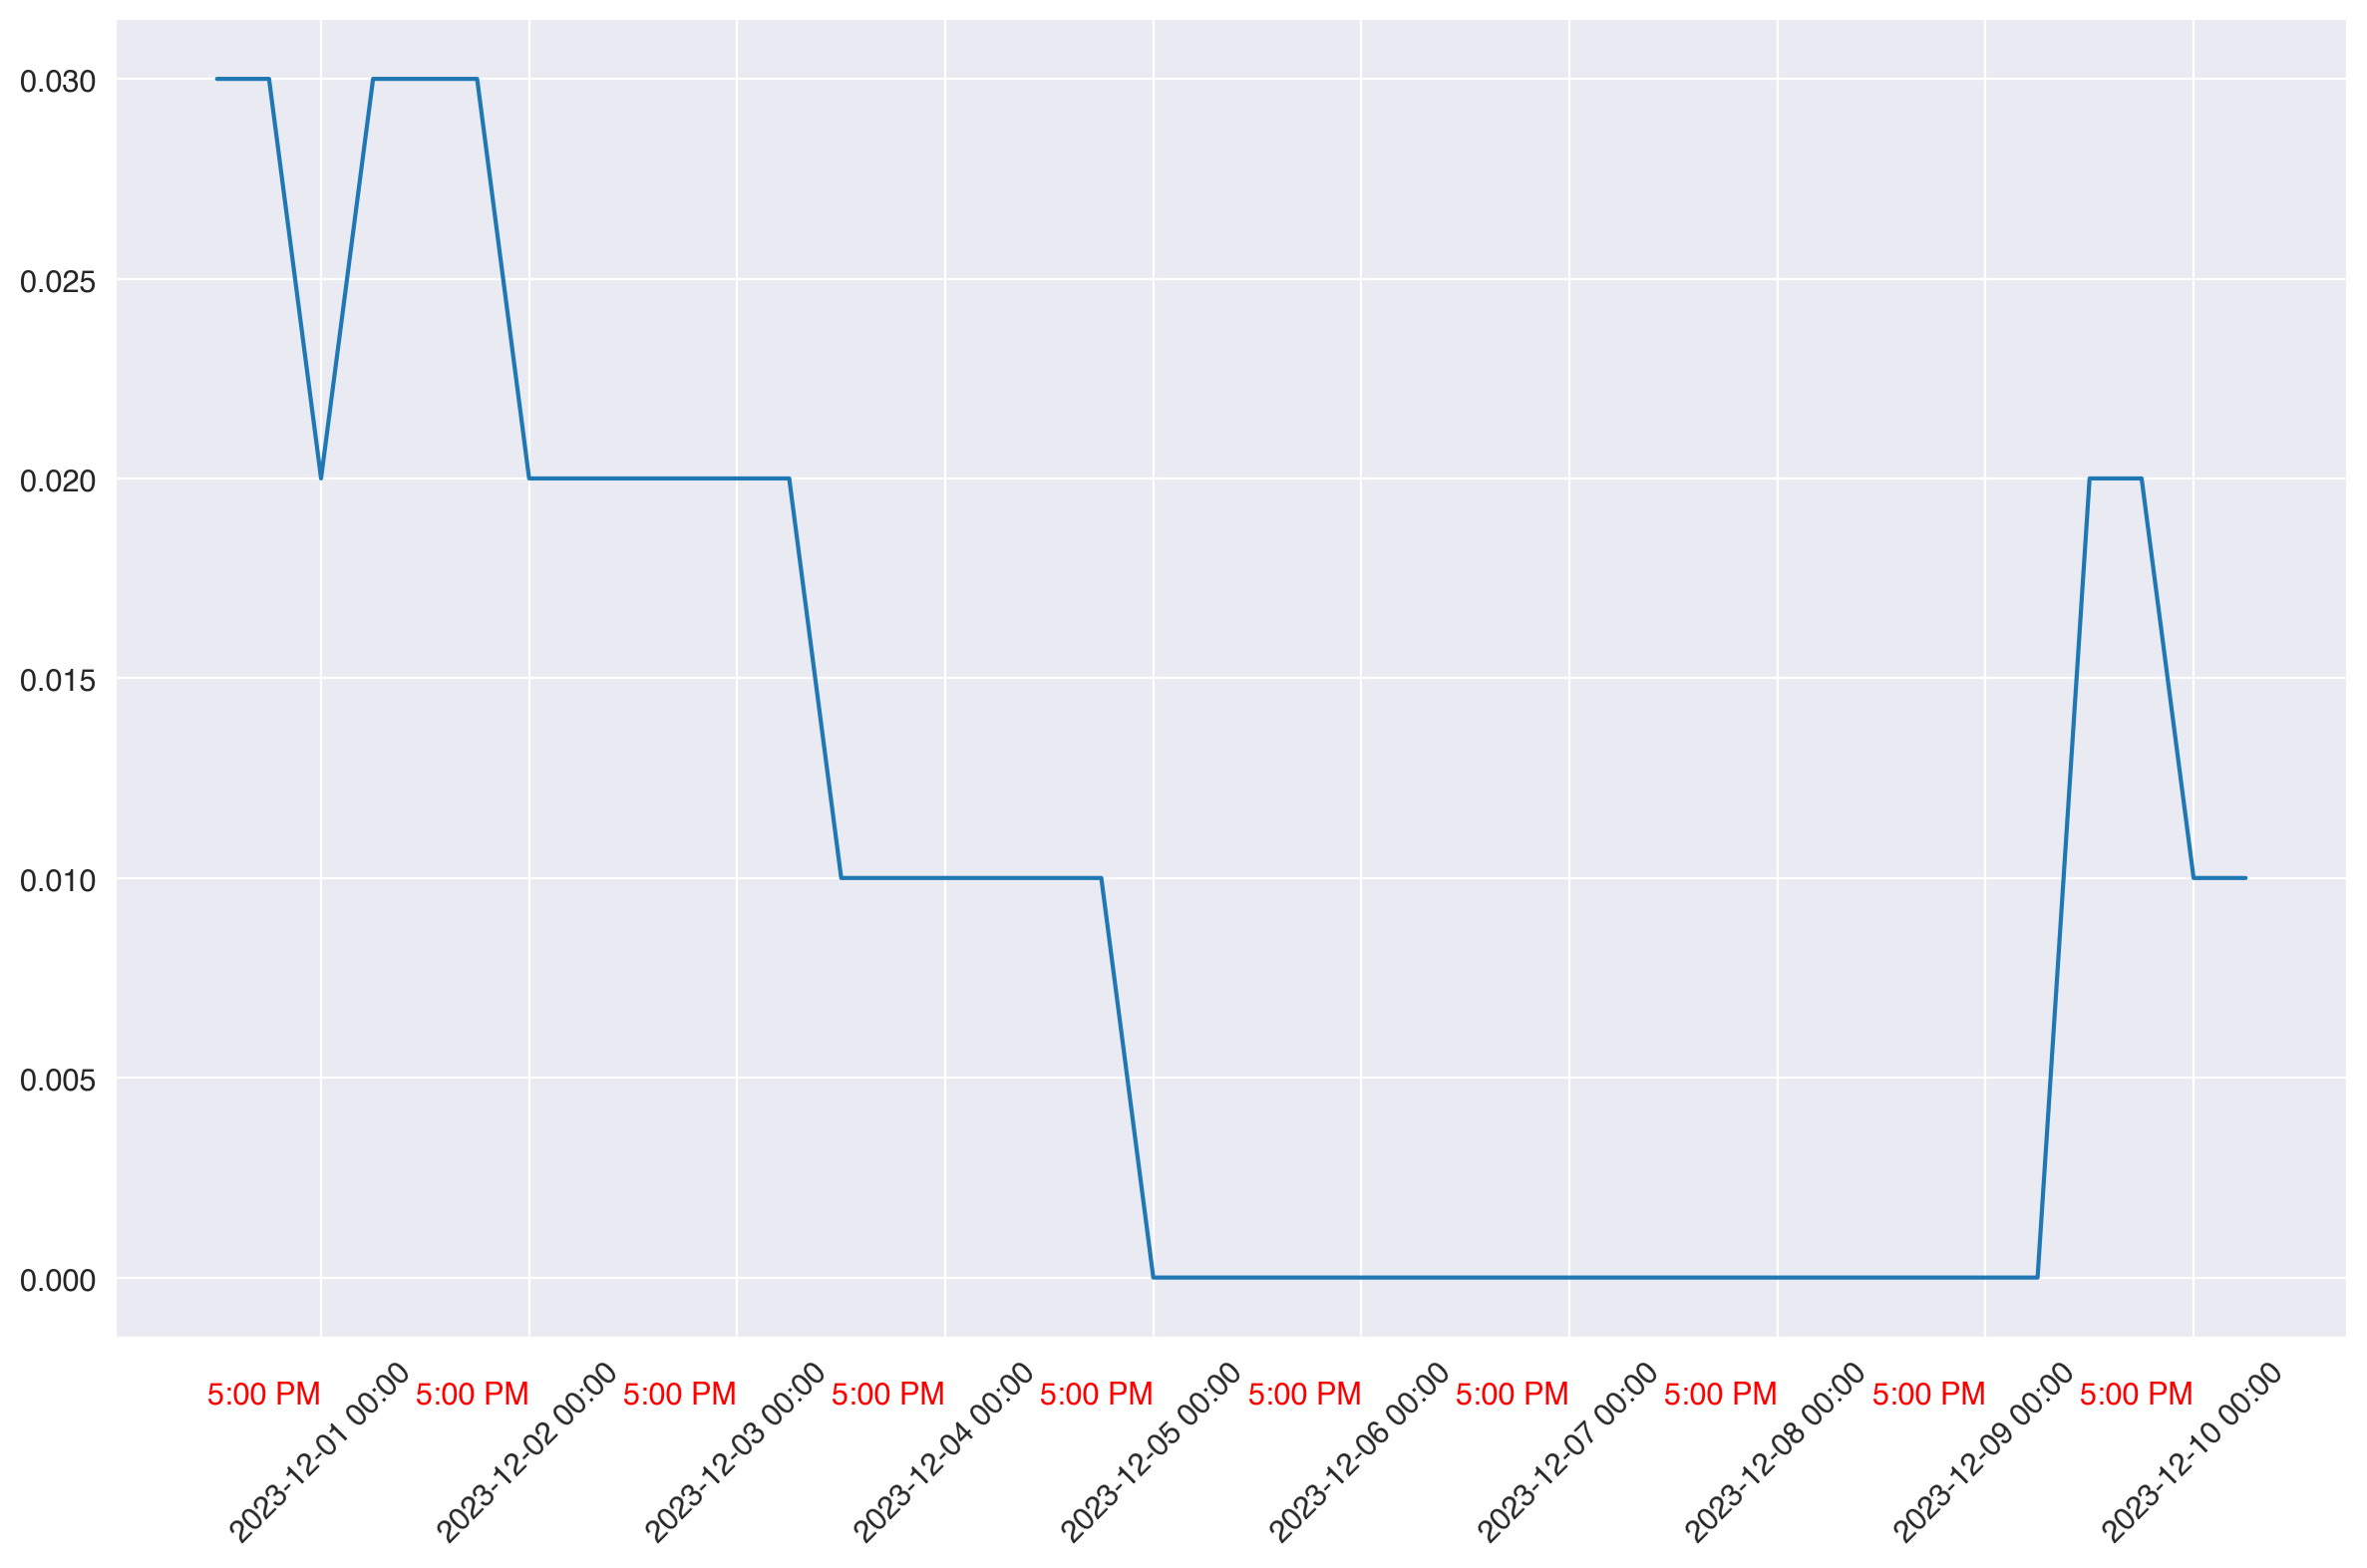

In [10]:
# Probability of exceeding 1cm of snowfall in next few days.
# Snow depth every 3 hours for 10 days out.
# cropped to uintah basin 

# Ouray
lon, lat = (360 - 109.6774, 40.0891)

ts = GEFSData.generate_timeseries(list(range(0,240,12)), init_dt, ":SNOD:", "sde", lat, lon,
                                    product="atmos.5",member='mean')
plotting.plot_meteogram(ts, "sde", title=None, save=None,second_df=None, second_col=None)

# Can also do fake soundings and the lapse rate estimate 

In [ ]:
# Now do probabilities of exceedence - loop over all members for this 14-day forecast
# and do 50th, 90th percentiles, probability of exceedence at different levels  

In [ ]:
# Plot map?
ds_snow = GEFSData.get_cropped_data(init_dt,fxx=12,q_str=":SNOD:",product="atmos.5")
fig, ax = plotting.surface_plot(ds_snow, "sde", fchr=0, label="SNOD", save=None,
                                # vlim=(1, None),
                                # levels=clvs,
                                # plot_type="contourf"
                                my_extent=[-110.9, -108.3, 41.15, 39.55]
                                )

In [ ]:
# Annotate grid cells with lat/lon? 

# Now plot lapse rates for each grid-cell on inversion day 
lon, lat = (360-109.6774, 40.0891)

init_dt = datetime.datetime(2023,11,30,0,0,0)

init_hb = utils.herbie_from_datetime(init_dt)
init_pd = utils.pd_from_datetime(init_dt)
fx = 12

ds_T = GEFSData.get_cropped_data(init_hb,fx,':TMP:.*mb',product="atmos.5") # - 273.15 # Celsius
ds_Z = GEFSData.get_cropped_data(init_hb,fx,':HGT:',product="atmos.5") # / 1000 # km
profile_df = GEFSData.get_profile_df(ds_T,ds_Z,lat,lon,max_height=5100)

plotting.plot_profile(profile_df["temp"], profile_df["height"],
                      "model", plot_levels=elevations,save=None,
                      title="HEY")

In [ ]:
profile_df


In [ ]:
# Now time to work out best grid-point to pick for surface verification 
# We can also use it for vertical data